In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
import seaborn as sns
import pandas as pd
from torchvision import datasets
from torchvision import transforms as tt
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torch import optim
import torch.nn as nn 
import timm
from torch.utils.data import Subset
import torch.nn.functional as F
import numpy as np
import random
from torch.utils.tensorboard import SummaryWriter
import seaborn as sns
#sns.set()

/home/francesco/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# CIFAR10

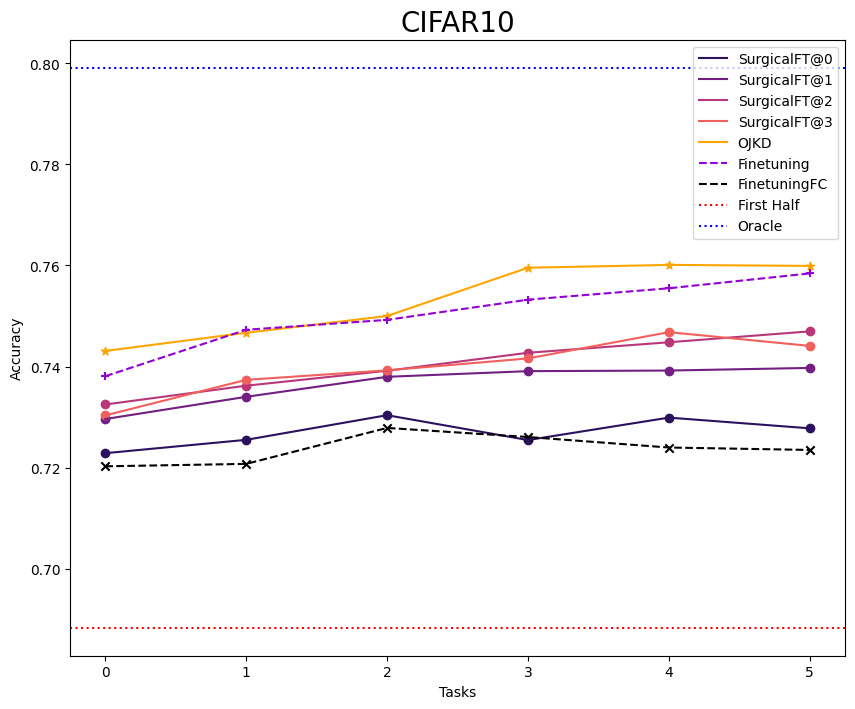

In [3]:

colors = ['orange', 'darkviolet', 'red']

colors = sns.color_palette("magma", n_colors=5)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
for i, l in enumerate([0,1,2]):
    df = pd.read_csv(f"results/cifar10/values_layer{l}.csv", header=None)
    all_results = df.loc[:, df.columns[1:-2]].values
    mean = all_results.mean(axis=0)
    std = all_results.std(axis=0)

    ax.plot(mean, label=f"SurgicalFT@{l}", color=colors[i])
    #ax.fill_between(range(len(mean)), mean-std, mean+std, color=colors[i], linewidth=0, alpha=0.3)
    ax.scatter(range(all_results.shape[1]), all_results.mean(axis=0), color=colors[i])

# OJKD
df = pd.read_csv(f"results/ojkd128.csv", header=None)
all_results = df.loc[:, df.columns[1:-2]].values
mean = all_results.mean(axis=0)
std = all_results.std(axis=0)

ax.plot(mean, label=f"OJKD", color='orange', ls='-')
ax.scatter(range(all_results.shape[1]), mean, color='orange', marker='*')
#ax.fill_between(range(len(mean)), mean-std, mean+std, color='orange', linewidth=0, alpha=0.3)

# Finetuning
df = pd.read_csv(f"results/finetuning.csv", header=None)
all_results = df.loc[:, df.columns[1:-2]].values
mean = all_results.mean(axis=0)
std = all_results.std(axis=0)

ax.plot(mean, label=f"Finetuning", color='darkviolet', ls='--')
ax.scatter(range(all_results.shape[1]), mean, color='darkviolet', marker='+')
#ax.fill_between(range(len(mean)), mean-std, mean+std, color='darkviolet', linewidth=0, alpha=0.3)


# FinetuningFC
df = pd.read_csv(f"results/finetuningFC.csv", header=None)
all_results = df.loc[:, df.columns[1:-2]].values
mean = all_results.mean(axis=0)
std = all_results.std(axis=0)

ax.plot(mean, label=f"FinetuningFC", color='black', ls='--')
ax.scatter(range(all_results.shape[1]), mean, color='black', marker='x')
#ax.fill_between(range(len(mean)), mean-std, mean+std, color='black', linewidth=0, alpha=0.3)



first_half = df.loc[:, df.columns == 7].values.mean()
second_half = df.loc[:, df.columns == 8].values.mean()
ax.axhline(first_half, label='First Half', color='red', ls=':')
ax.axhline(second_half, label='Oracle', color='blue', ls=':')
ax.set_title('CIFAR10', fontsize=20)
ax.set_xlabel('Tasks')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

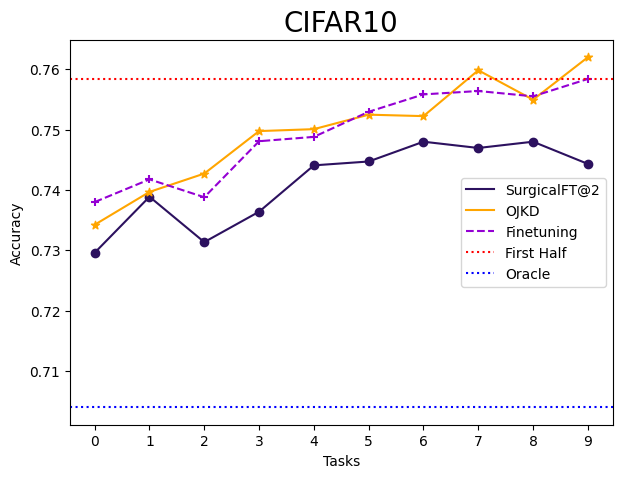

In [14]:

colors = ['orange', 'darkviolet', 'red']

colors = sns.color_palette("magma", n_colors=5)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
for i, l in enumerate([2]):
    df = pd.read_csv(f"results/10_tasks/surgical{l}.csv", header=None)
    all_results = df.loc[:, df.columns[1:-2]].values
    mean = all_results.mean(axis=0)
    std = all_results.std(axis=0)

    ax.plot(mean, label=f"SurgicalFT@{l}", color=colors[i])
    #ax.fill_between(range(len(mean)), mean-std, mean+std, color=colors[i], linewidth=0, alpha=0.3)
    ax.scatter(range(all_results.shape[1]), all_results.mean(axis=0), color=colors[i])

# OJKD
df = pd.read_csv(f"results/10_tasks/ojkd128.csv", header=None)
all_results = df.loc[:, df.columns[1:-2]].values
mean = all_results.mean(axis=0)
std = all_results.std(axis=0)

ax.plot(mean, label=f"OJKD", color='orange', ls='-')
ax.scatter(range(all_results.shape[1]), mean, color='orange', marker='*')
#ax.fill_between(range(len(mean)), mean-std, mean+std, color='darkviolet', linewidth=0, alpha=0.3)

# Finetuning
df = pd.read_csv(f"results/10_tasks/finetuning.csv", header=None)
all_results = df.loc[:, df.columns[1:-2]].values
mean = all_results.mean(axis=0)
std = all_results.std(axis=0)

ax.plot(mean, label=f"Finetuning", color='darkviolet', ls='--')
ax.scatter(range(all_results.shape[1]), mean, color='darkviolet', marker='+')
#ax.fill_between(range(len(mean)), mean-std, mean+std, color='darkviolet', linewidth=0, alpha=0.3)



first_half = df.loc[:, df.columns == 10].values.mean()
second_half = df.loc[:, df.columns == 11].values.mean()
ax.axhline(first_half, label='First Half', color='red', ls=':')
ax.axhline(second_half, label='Oracle', color='blue', ls=':')
ax.set_xticks(range(len(mean)))
ax.set_title('CIFAR10', fontsize=20)
ax.set_xlabel('Tasks')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

# SVHN

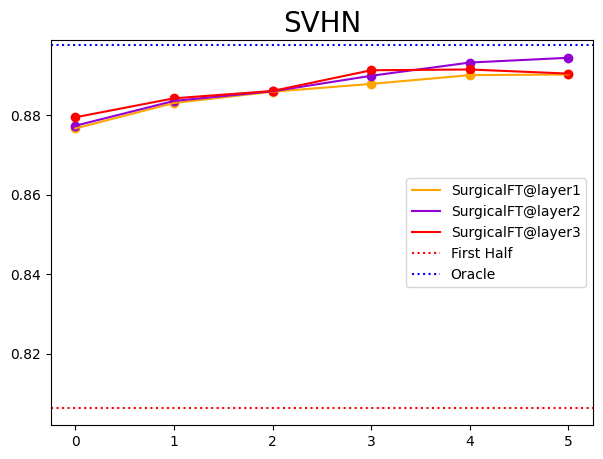

In [64]:
colors = ['orange', 'darkviolet', 'red']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))

for i, l in enumerate([1,2,3]):
    
    df = pd.read_csv(f"results/svhn/svhn_layer{l}.csv", header=None)
    all_results = df.loc[:, df.columns[1:-2]].values
    mean = all_results.mean(axis=0)
    std = all_results.std(axis=0)
    
    ax.plot(mean, label=f"SurgicalFT@layer{l}", color=colors[i])
    ax.scatter(range(all_results.shape[1]), mean, color=colors[i])
    #ax.fill_between(range(len(mean)), mean-std, mean+std, color=colors[i], linewidth=0, alpha=0.3)


first_half = df.loc[:, df.columns == 7].values.mean()
second_half = df.loc[:, df.columns == 8].values.mean()
plt.axhline(first_half, label='First Half', color='red', ls=':')
ax.axhline(second_half, label='Oracle', color='blue', ls=':')
ax.set_title('SVHN', fontsize=20)
ax.legend()
plt.show()

In [ ]:
dd

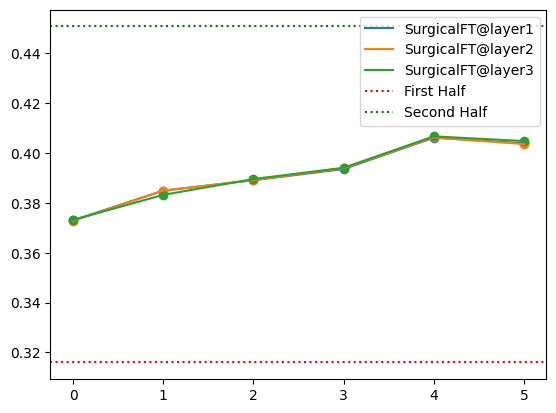

In [3]:
for l in [1,2,3]:
    
    df = pd.read_csv(f"results/cifar100/CIFAR100_layer{l}.csv", header=None)
    all_results = df.loc[:, df.columns[1:-2]].values
    plt.plot(all_results.mean(axis=0), label=f"SurgicalFT@layer{l}")
    plt.scatter(range(all_results.shape[1]), all_results.mean(axis=0))

first_half = df.loc[:, df.columns == 7].values.mean()
second_half = df.loc[:, df.columns == 8].values.mean()
plt.axhline(first_half, label='First Half', color='red', ls=':')
plt.axhline(second_half, label='Second Half', color='green', ls=':')
plt.legend()
plt.show()

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_csv(csv_files, dataset, methods, model):

    colors = sns.color_palette("hls", n_colors=len(methods))
    fig, ax = plt.subplots(figsize=(10, 6))

    # Read csv file
    for i, (csv_file, method) in enumerate(zip(csv_files, methods)):

        df = pd.read_csv(csv_file)

        # number of tasks
        num_tasks = df.shape[1] - 3

        all_results = df.loc[:, df.columns[1:-2]].values
        seeds = len(all_results)
        mean = all_results.mean(axis=0)
        std = all_results.std(axis=0)

        plt.plot(mean, label=method, color=colors[i], ls='-')
        ax.scatter(range(all_results.shape[1]), mean, color=colors[i])
        ax.fill_between(range(len(mean)), mean-std, mean+std, linewidth=1, color=colors[i], alpha=0.1)

        ax.set_xticks(range(num_tasks))
        ax.set_xticklabels(range(1, num_tasks+1))
        ax.set_xlabel('Tasks')
        ax.set_ylabel('Accuracy')
        ax.set_title(f'Avg {seeds} seeds on {dataset} dataset - model {model}')
        ax.legend()
    plt.grid()
    plt.show()


['Finetuning', 'replay500']


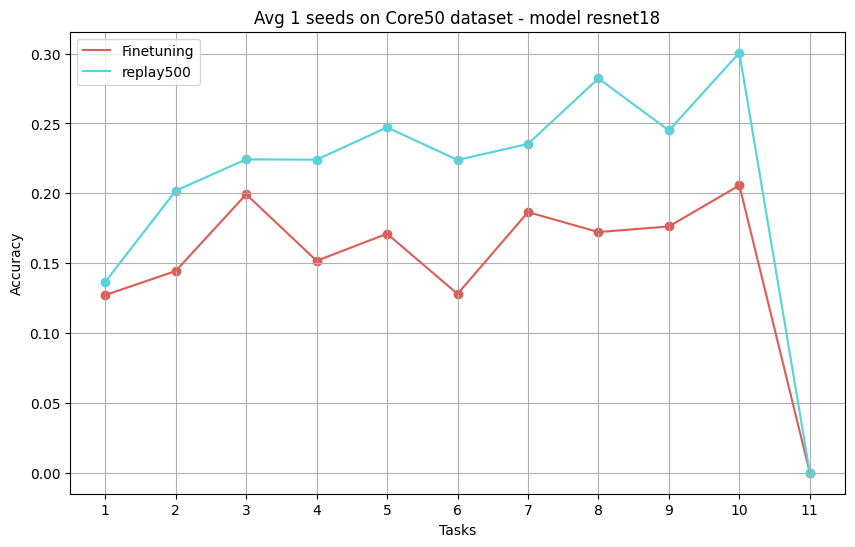

In [3]:
csv_files=["csv/Core50_11tasks_Finetuning_resnet18.csv", 
           "csv/Core50_11tasks_replay500_resnet18.csv"
           ]

methods = [x.split('_')[2] for x in csv_files]
print(methods)
plot_csv(csv_files, "Core50", methods, 'resnet18')

['Finetuning', 'OJKD', 'SurgicalFT3', 'FinetuningFC', 'CDD', 'Boundary', 'replay500']


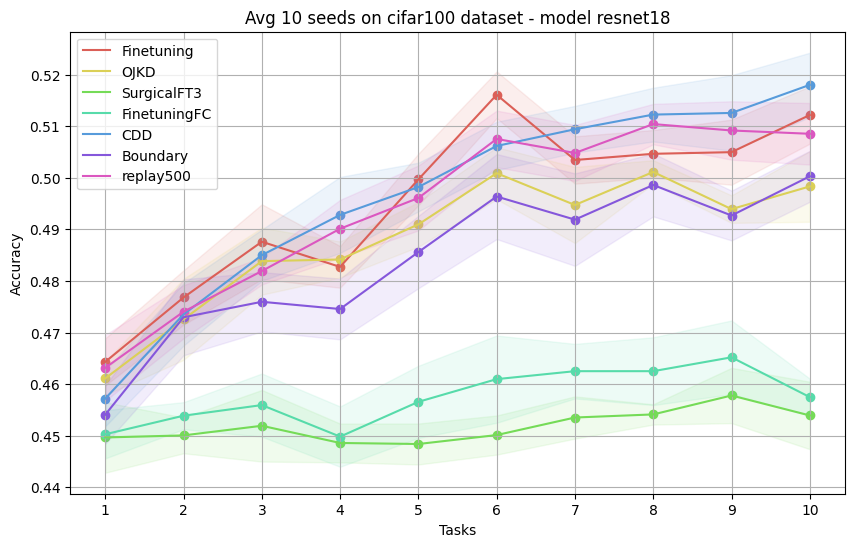

In [10]:

csv_files=["csv/CIFAR100_10tasks_Finetuning_resnet18.csv", 
           "csv/CIFAR100_10tasks_OJKD_resnet18.csv",
           "csv/CIFAR100_10tasks_SurgicalFT3_resnet18.csv",
           "csv/CIFAR100_10tasks_FinetuningFC_resnet18.csv",
           "csv/CIFAR100_10tasks_CDD_resnet18.csv",
           "csv/CIFAR100_10tasks_Boundary_resnet18.csv",
           "csv/CIFAR100_10tasks_replay500_resnet18.csv",
           ]

methods = [x.split('_')[2] for x in csv_files]
print(methods)
plot_csv(csv_files, "cifar100", methods, 'resnet18')

['Finetuning', 'CDD500', 'SurgicalFT3', 'FinetuningFC']


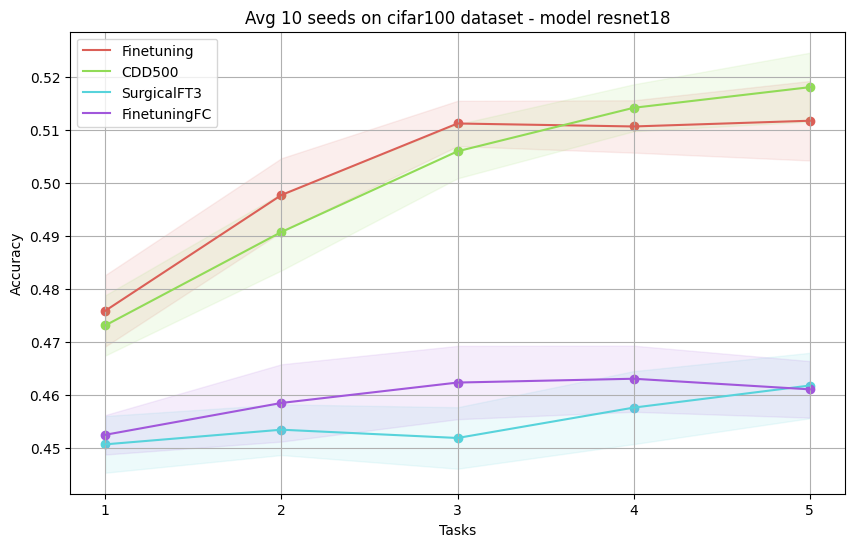

In [11]:
csv_files=["csv/CIFAR100_5tasks_Finetuning_resnet18.csv", 
           "csv/CIFAR100_5tasks_CDD500_resnet18.csv",
           "csv/CIFAR100_5tasks_SurgicalFT3_resnet18.csv",
           "csv/CIFAR100_5tasks_FinetuningFC_resnet18.csv"]

methods = [x.split('_')[2] for x in csv_files]
print(methods)
plot_csv(csv_files, "cifar100", methods, 'resnet18')

['Finetuning', 'replay500', 'SurgicalFT3', 'FinetuningFC']


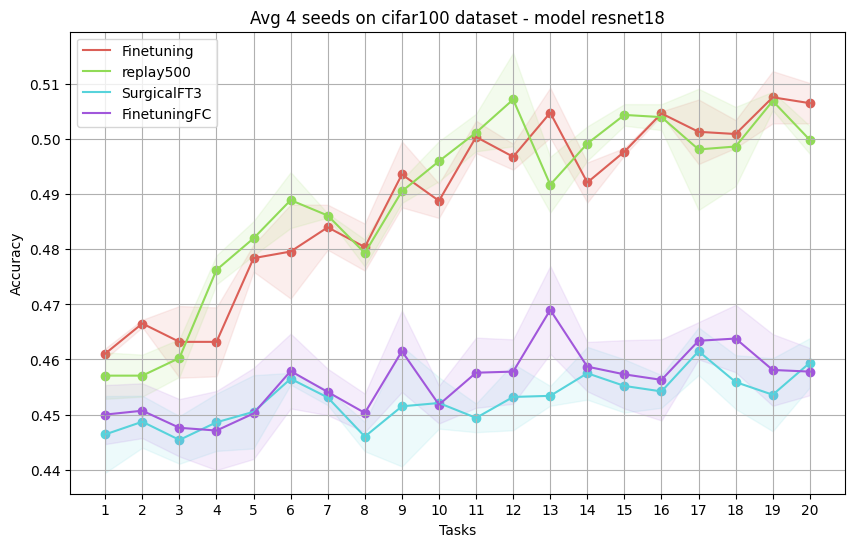

In [13]:
csv_files=["csv/CIFAR100_20tasks_Finetuning_resnet18.csv", 
           "csv/CIFAR100_20tasks_replay500_resnet18.csv",
           "csv/CIFAR100_20tasks_SurgicalFT3_resnet18.csv",
           "csv/CIFAR100_20tasks_FinetuningFC_resnet18.csv"]

methods = [x.split('_')[2] for x in csv_files]
print(methods)
plot_csv(csv_files, "cifar100", methods, 'resnet18')